In [1]:
from utils.solver import solve_SCRMFT
import pandas as pd

from matplotlib import pyplot as plt
%config InlineBackend.figure_formats = ['svg']
plt.rc('figure', figsize=(6, 6))

In [2]:
# input_file = pd.read_excel('./input_files/O16_RMF.xlsx', sheet_name=None)
input_file = pd.read_excel('./input_files/Ca40_RMF.xlsx', sheet_name=None)

Important to note that sometimes code fails because match radius might be too close to a node. If we get error that there is an invalid quantity inside a square root, then see which energy failed and play around with the match radius until it works.

In [3]:
energy, wfk = solve_SCRMFT(input_file,tol=0.05)

Succesfully converged with 17 iterations
Succesfully converged with 19 iterations
Succesfully converged with 15 iterations
Succesfully converged with 19 iterations
Succesfully converged with 19 iterations
Succesfully converged with 12 iterations
Succesfully converged with 16 iterations
Succesfully converged with 20 iterations
Succesfully converged with 14 iterations
Succesfully converged with 19 iterations
Succesfully converged with 15 iterations
Succesfully converged with 12 iterations
Succesfully converged with 16 iterations
Succesfully converged with 19 iterations
Succesfully converged with 15 iterations
Succesfully converged with 27 iterations
Succesfully converged with 17 iterations
Succesfully converged with 11 iterations
Succesfully converged with 19 iterations
Succesfully converged with 27 iterations
Succesfully converged with 15 iterations
Succesfully converged with 18 iterations
Succesfully converged with 16 iterations
Succesfully converged with 11 iterations
Succesfully conv

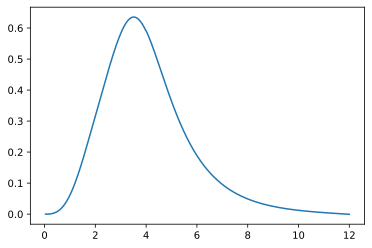

In [20]:
index = 5
r_array = wfk[index][0]
u_array = wfk[index][1]
v_array = wfk[index][2]

plt.plot(r_array,u_array)
# plt.plot(r_array,v_array)

In [7]:
energy

array([[886.33911008,   2.        ,   1.        ],
       [904.13432792,   4.        ,   1.        ],
       [911.40515575,   2.        ,   1.        ],
       [920.93635614,   6.        ,   1.        ],
       [929.84439526,   2.        ,   1.        ],
       [931.56117156,   4.        ,   1.        ],
       [886.33911008,   2.        ,   1.        ],
       [904.13432792,   4.        ,   1.        ],
       [911.40515575,   2.        ,   1.        ],
       [920.93635614,   6.        ,   1.        ],
       [929.84439526,   2.        ,   1.        ],
       [931.56117156,   4.        ,   1.        ]])